In [1]:
import numpy as np  
import pandas as pd 
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import math
%matplotlib inline 

In [2]:
orders = pd.read_csv("orders.txt", encoding='cp1251', sep='\t')
customers = pd.read_csv("customers.txt", encoding='cp1251', sep='\t')
products = pd.read_csv("products.txt", encoding='cp1251', sep='\t')
orderline = pd.read_csv("orderlines.txt", encoding='cp1251', sep='\t')
campaigns = pd.read_csv("campaigns.txt", encoding='cp1251', sep='\t')
subs = pd.read_csv("Subscribers.txt", encoding='cp1251', sep='\t')
zipcounty = pd.read_csv("zipcounty.txt", encoding  = 'cp1251', sep='\t')

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192983 entries, 0 to 192982
Data columns (total 11 columns):
orderid          192983 non-null int64
customerid       192983 non-null int64
campaignid       192983 non-null int64
orderdate        192983 non-null object
city             192964 non-null object
state            191864 non-null object
zipcode          192837 non-null object
paymenttype      192983 non-null object
totalprice       192983 non-null float64
numorderlines    192983 non-null int64
numunits         192983 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 16.2+ MB


In [4]:
zipcounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42092 entries, 0 to 42091
Data columns (total 12 columns):
zipcode                 42092 non-null int64
latitude                42092 non-null float64
longitude               42092 non-null float64
poname                  42092 non-null object
zipclass                42092 non-null object
countyfips              42092 non-null int64
state                   42044 non-null object
countyname              42044 non-null object
countypop               42092 non-null int64
countyhu                42092 non-null int64
countylandareamiles     42092 non-null float64
countywaterareamiles    42092 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 3.9+ MB


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189559 entries, 0 to 189558
Data columns (total 4 columns):
customerid     189559 non-null int64
householdid    189559 non-null int64
gender         173355 non-null object
firstname      186644 non-null object
dtypes: int64(2), object(2)
memory usage: 5.8+ MB


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 6 columns):
PRODUCTID           4040 non-null int64
PRODUCTNAME         0 non-null float64
PRODUCTGROUPCODE    4040 non-null object
PRODUCTGROUPNAME    4039 non-null object
INSTOCKFLAG         4040 non-null object
FULLPRICE           4040 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 189.5+ KB


In [7]:
orderline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286017 entries, 0 to 286016
Data columns (total 8 columns):
orderlineid    286017 non-null int64
orderid        286017 non-null int64
productid      286017 non-null int64
shipdate       286017 non-null object
billdate       286017 non-null object
unitprice      281033 non-null float64
numunits       286017 non-null int64
totalprice     286017 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.5+ MB


In [8]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
campaignid          239 non-null int64
campaignname        0 non-null float64
channel             239 non-null object
discount            239 non-null int64
freeshippingflag    239 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 9.4+ KB


In [9]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5068035 entries, 0 to 5068034
Data columns (total 10 columns):
customer_id    int64
rate_plan      object
monthly_fee    float64
market         object
channel        object
start_date     object
stop_date      object
stop_type      object
tenure         float64
censored       int64
dtypes: float64(2), int64(2), object(6)
memory usage: 386.7+ MB


In [10]:
customers.head()

,customerid,householdid,gender,firstname
0,174596,53949999,M,DANIEL
1,68239,49927024,M,JIM
2,10203,20914414,F,DONNA
3,174288,53957047,F,DIONE
4,68099,49927024,M,JIM


In [11]:
zipcounty.head()

,zipcode,latitude,longitude,poname,zipclass,countyfips,state,countyname,countypop,countyhu,countylandareamiles,countywaterareamiles
0,773,18.366028,-65.708138,LUQUILLO,,72089,PR,Luquillo Municipio,19817,9327,25.697733,20.725328
1,775,18.323736,-65.296471,CULEBRA,P,72049,PR,Culebra Municipio,1868,1024,11.618370,157.207930
2,777,18.206490,-65.901772,JUNCOS,,72077,PR,Juncos Municipio,36452,13064,26.586044,0.012102
3,778,18.259092,-65.974640,GURABO,,72063,PR,Gurabo Municipio,36743,12854,27.841166,0.437728
4,780,18.001995,-66.607430,COTO LAUREL,,72113,PR,Ponce Municipio,186475,66471,114.721200,78.884560


In [12]:
subs.head()

,customer_id,rate_plan,monthly_fee,market,channel,start_date,stop_date,stop_type,tenure,censored
0,2,Top,150.0,Gotham,Dealer,2001-09-16,NaN,NaN,1929.0,1
1,52,Bottom,25.0,Metropolis,Mail,1997-01-13,2004-12-17,V,2895.0,0
2,76,Bottom,25.0,Gotham,Dealer,2000-12-08,2004-10-23,V,1415.0,0
3,89,Bottom,25.0,Gotham,Dealer,1999-09-16,2004-03-18,V,1645.0,0
4,217,Bottom,40.0,Gotham,Dealer,2000-09-04,2004-11-25,I,1543.0,0


In [13]:
campaigns.head()

,campaignid,campaignname,channel,discount,freeshippingflag
0,2001,NaN,PARTNER,0,N
1,2002,NaN,AD,0,N
2,2003,NaN,PARTNER,0,N
3,2004,NaN,PARTNER,0,N
4,2005,NaN,PARTNER,0,N


In [14]:
orderline.head()

,orderlineid,orderid,productid,shipdate,billdate,unitprice,numunits,totalprice
0,1010561,1006414,10834,2011-03-07 00:00:00,2011-03-08 00:00:00,18.00,1,18.00
1,1010562,1006541,11052,2011-01-19 00:00:00,2011-01-20 00:00:00,10.00,2,20.00
2,1010563,1006542,11070,2011-01-19 00:00:00,2011-01-20 00:00:00,19.12,1,19.12
3,1010564,1010154,11196,2009-11-19 00:00:00,2009-11-20 00:00:00,14.95,1,14.95
4,1010565,1009110,11048,2009-11-11 00:00:00,2009-11-12 00:00:00,10.00,2,20.00


In [15]:
products.head()

,PRODUCTID,PRODUCTNAME,PRODUCTGROUPCODE,PRODUCTGROUPNAME,INSTOCKFLAG,FULLPRICE
0,10001,NaN,CA,CALENDAR,N,15
1,10002,NaN,CA,CALENDAR,N,10
2,10003,NaN,CA,CALENDAR,N,10
3,10004,NaN,BK,BOOK,Y,90
4,10005,NaN,BK,BOOK,Y,16


In [16]:
customers.count()

customerid     189559
householdid    189559
gender         173355
firstname      186644
dtype: int64

In [17]:
subs.count()

customer_id    5068035
rate_plan      5068035
monthly_fee    5068035
market         5068035
channel        5068035
start_date     5067854
stop_date      2677076
stop_type      2677076
tenure         5067891
censored       5068035
dtype: int64

In [18]:
cussub = pd.merge(customers,subs, left_on='customerid',right_on='customer_id',how='left')

In [19]:
cussub.tail()

,customerid,householdid,gender,firstname,customer_id,rate_plan,monthly_fee,market,channel,start_date,stop_date,stop_type,tenure,censored
189554,174268,53950750,M,WILLIAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189555,174594,53949991,M,DANIEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189556,139779,45334427,M,PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189557,174256,53949982,M,GREGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189558,163204,22279373,M,THOMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ord_dl = pd.merge(orderline, orders,left_on='orderid', right_on='orderid',how='left')

In [21]:
ord_dl['zipcode'] = pd.to_numeric(ord_dl['zipcode'], errors='coerce')

In [22]:
ord_ordl = pd.merge(ord_dl, zipcounty,left_on='zipcode', right_on='zipcode',how='left')

C:\Users\Przyw\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


In [23]:
ord_ordl.count()

orderlineid             286017
orderid                 286017
productid               286017
shipdate                286017
billdate                286017
unitprice               281033
numunits_x              286017
totalprice_x            286017
customerid              286017
campaignid              286017
orderdate               286017
city                    285983
state_x                 284212
zipcode                 282595
paymenttype             286017
totalprice_y            286017
numorderlines           286017
numunits_y              286017
latitude                280094
longitude               280094
poname                  280094
zipclass                280094
countyfips              280094
state_y                 280045
countyname              280045
countypop               280094
countyhu                280094
countylandareamiles     280094
countywaterareamiles    280094
dtype: int64

In [24]:
ord_ordl['billdate'] = pd.to_datetime(ord_ordl['billdate'])
ord_ordl['orderdate'] = pd.to_datetime(ord_ordl['orderdate'])

In [25]:
ord_ordl.count()

orderlineid             286017
orderid                 286017
productid               286017
shipdate                286017
billdate                286017
unitprice               281033
numunits_x              286017
totalprice_x            286017
customerid              286017
campaignid              286017
orderdate               286017
city                    285983
state_x                 284212
zipcode                 282595
paymenttype             286017
totalprice_y            286017
numorderlines           286017
numunits_y              286017
latitude                280094
longitude               280094
poname                  280094
zipclass                280094
countyfips              280094
state_y                 280045
countyname              280045
countypop               280094
countyhu                280094
countylandareamiles     280094
countywaterareamiles    280094
dtype: int64

In [26]:
ord_ordl['Delivery time'] = (ord_ordl['billdate'] - ord_ordl['orderdate']).dt.days

In [27]:
odlcussub = pd.merge(ord_ordl, cussub,left_on='customerid', right_on='customerid',how='left')

In [28]:
#sns.countplot(x='zipcode',data=ord_ordl)

In [29]:
odlcussub.count()

orderlineid             286017
orderid                 286017
productid               286017
shipdate                286017
billdate                286017
unitprice               281033
numunits_x              286017
totalprice_x            286017
customerid              286017
campaignid              286017
orderdate               286017
city                    285983
state_x                 284212
zipcode                 282595
paymenttype             286017
totalprice_y            286017
numorderlines           286017
numunits_y              286017
latitude                280094
longitude               280094
poname                  280094
zipclass                280094
countyfips              280094
state_y                 280045
countyname              280045
countypop               280094
countyhu                280094
countylandareamiles     280094
countywaterareamiles    280094
Delivery time           286017
householdid             280853
gender                  256967
firstnam

In [30]:
odlcussub.drop(labels=['channel','zipcode','state_x','city','orderlineid','tenure','market',
                       'monthly_fee','customerid','rate_plan','stop_type','censored','householdid','unitprice'
                       ,'firstname','start_date','shipdate','latitude','longitude','poname','zipclass',
                        'countyfips','countyname'],axis=1,inplace=True)

In [31]:
odlcussub['billdate'] = pd.to_datetime(odlcussub['billdate'])

In [32]:
odlcussub.head()

,orderid,productid,billdate,numunits_x,totalprice_x,campaignid,orderdate,paymenttype,totalprice_y,numorderlines,numunits_y,state_y,countypop,countyhu,countylandareamiles,countywaterareamiles,Delivery time,gender,customer_id,stop_date
0,1006414,10834,2011-03-08,1,18.00,2141,2011-01-18,MC,36.00,2,2,AL,662047.0,288162.0,1112.60720,11.196409,49,M,NaN,NaN
1,1006541,11052,2011-01-20,2,20.00,2141,2011-01-18,MC,20.00,1,2,CT,824008.0,340732.0,605.63831,256.379030,2,M,NaN,NaN
2,1006542,11070,2011-01-20,1,19.12,2141,2011-01-18,VI,19.12,1,1,CT,155071.0,67285.0,369.26270,69.805969,2,M,NaN,NaN
3,1010154,11196,2009-11-20,1,14.95,2173,2009-10-30,AE,14.95,1,1,NY,923459.0,349445.0,432.82443,67.259819,21,M,NaN,NaN
4,1009110,11048,2009-11-12,2,20.00,2141,2009-10-30,VI,49.90,2,4,NJ,470212.0,174379.0,468.99237,12.293914,13,F,NaN,NaN


In [33]:
#odlcussub['return']= odlcussub['totalprice_y'] 
#odlcussub.loc[odlcussub['totalprice_y'] == 0, 'return'] = 0
odlcussub['return'] = np.where(odlcussub['totalprice_y']==0, 1,0)

In [34]:
odlcussub.head()

,orderid,productid,billdate,numunits_x,totalprice_x,campaignid,orderdate,paymenttype,totalprice_y,numorderlines,...,state_y,countypop,countyhu,countylandareamiles,countywaterareamiles,Delivery time,gender,customer_id,stop_date,return
0,1006414,10834,2011-03-08,1,18.00,2141,2011-01-18,MC,36.00,2,...,AL,662047.0,288162.0,1112.60720,11.196409,49,M,NaN,NaN,0
1,1006541,11052,2011-01-20,2,20.00,2141,2011-01-18,MC,20.00,1,...,CT,824008.0,340732.0,605.63831,256.379030,2,M,NaN,NaN,0
2,1006542,11070,2011-01-20,1,19.12,2141,2011-01-18,VI,19.12,1,...,CT,155071.0,67285.0,369.26270,69.805969,2,M,NaN,NaN,0
3,1010154,11196,2009-11-20,1,14.95,2173,2009-10-30,AE,14.95,1,...,NY,923459.0,349445.0,432.82443,67.259819,21,M,NaN,NaN,0
4,1009110,11048,2009-11-12,2,20.00,2141,2009-10-30,VI,49.90,2,...,NJ,470212.0,174379.0,468.99237,12.293914,13,F,NaN,NaN,0


In [35]:
allexprod = pd.merge(odlcussub, campaigns,left_on='campaignid', right_on='campaignid',how='left')

In [36]:
all_merge = pd.merge(allexprod, products,left_on='productid', right_on='PRODUCTID',how='left')

In [37]:
all_merge.head()

,orderid,productid,billdate,numunits_x,totalprice_x,campaignid,orderdate,paymenttype,totalprice_y,numorderlines,...,campaignname,channel,discount,freeshippingflag,PRODUCTID,PRODUCTNAME,PRODUCTGROUPCODE,PRODUCTGROUPNAME,INSTOCKFLAG,FULLPRICE
0,1006414,10834,2011-03-08,1,18.00,2141,2011-01-18,MC,36.00,2,...,NaN,PARTNER,10,N,10834,NaN,BK,BOOK,N,25
1,1006541,11052,2011-01-20,2,20.00,2141,2011-01-18,MC,20.00,1,...,NaN,PARTNER,10,N,11052,NaN,AR,ARTWORK,Y,12
2,1006542,11070,2011-01-20,1,19.12,2141,2011-01-18,VI,19.12,1,...,NaN,PARTNER,10,N,11070,NaN,OC,OCCASION,Y,39
3,1010154,11196,2009-11-20,1,14.95,2173,2009-10-30,AE,14.95,1,...,NaN,AD,0,N,11196,NaN,BK,BOOK,Y,25
4,1009110,11048,2009-11-12,2,20.00,2141,2009-10-30,VI,49.90,2,...,NaN,PARTNER,10,N,11048,NaN,AR,ARTWORK,Y,13


In [38]:
all_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286017 entries, 0 to 286016
Data columns (total 31 columns):
orderid                 286017 non-null int64
productid               286017 non-null int64
billdate                286017 non-null datetime64[ns]
numunits_x              286017 non-null int64
totalprice_x            286017 non-null float64
campaignid              286017 non-null int64
orderdate               286017 non-null datetime64[ns]
paymenttype             286017 non-null object
totalprice_y            286017 non-null float64
numorderlines           286017 non-null int64
numunits_y              286017 non-null int64
state_y                 280045 non-null object
countypop               280094 non-null float64
countyhu                280094 non-null float64
countylandareamiles     280094 non-null float64
countywaterareamiles    280094 non-null float64
Delivery time           286017 non-null int64
gender                  256967 non-null object
customer_id             5188

In [39]:
das = all_merge.loc[~all_merge['totalprice_y'].isin([0])]
das['prod'] = np.where(das['numunits_x']==1,
                                  das['totalprice_x'],
                                  das['totalprice_x'] / das['numunits_x']) 
avgprod = das.groupby(['productid'],axis=0)['prod'].mean().to_frame().reset_index()

C:\Users\Przyw\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
avgprod.head()

,productid,prod
0,10001,13.824494
1,10002,10.699476
2,10003,10.383598
3,10004,78.405882
4,10005,15.121087


In [41]:
all_merge = pd.merge(all_merge, avgprod,on='productid',how='left')

In [42]:
all_merge.drop(labels=['INSTOCKFLAG','PRODUCTGROUPCODE','PRODUCTNAME','PRODUCTID','productid','campaignid',
                       'campaignname'],axis=1,inplace=True)

In [43]:
all_merge.head()

,orderid,billdate,numunits_x,totalprice_x,orderdate,paymenttype,totalprice_y,numorderlines,numunits_y,state_y,...,gender,customer_id,stop_date,return,channel,discount,freeshippingflag,PRODUCTGROUPNAME,FULLPRICE,prod
0,1006414,2011-03-08,1,18.00,2011-01-18,MC,36.00,2,2,AL,...,M,NaN,NaN,0,PARTNER,10,N,BOOK,25,18.665828
1,1006541,2011-01-20,2,20.00,2011-01-18,MC,20.00,1,2,CT,...,M,NaN,NaN,0,PARTNER,10,N,ARTWORK,12,10.132697
2,1006542,2011-01-20,1,19.12,2011-01-18,VI,19.12,1,1,CT,...,M,NaN,NaN,0,PARTNER,10,N,OCCASION,39,18.148125
3,1010154,2009-11-20,1,14.95,2009-10-30,AE,14.95,1,1,NY,...,M,NaN,NaN,0,AD,0,N,BOOK,25,14.771128
4,1009110,2009-11-12,2,20.00,2009-10-30,VI,49.90,2,4,NJ,...,F,NaN,NaN,0,PARTNER,10,N,ARTWORK,13,10.084857


In [44]:
all_merge.loc[all_merge['paymenttype'].isin(['VI'])]

,orderid,billdate,numunits_x,totalprice_x,orderdate,paymenttype,totalprice_y,numorderlines,numunits_y,state_y,...,gender,customer_id,stop_date,return,channel,discount,freeshippingflag,PRODUCTGROUPNAME,FULLPRICE,prod
2,1006542,2011-01-20,1,19.12,2011-01-18,VI,19.12,1,1,CT,...,M,NaN,NaN,0,PARTNER,10,N,OCCASION,39,18.148125
4,1009110,2009-11-12,2,20.00,2009-10-30,VI,49.90,2,4,NJ,...,F,NaN,NaN,0,PARTNER,10,N,ARTWORK,13,10.084857
5,1009110,2009-11-20,2,29.90,2009-10-30,VI,49.90,2,4,NJ,...,F,NaN,NaN,0,PARTNER,10,N,BOOK,25,14.771128
15,1008577,2010-12-10,1,19.95,2010-12-01,VI,34.90,2,2,NV,...,F,NaN,NaN,0,PARTNER,10,N,BOOK,20,18.739351
16,1008577,2010-12-19,1,14.95,2010-12-01,VI,34.90,2,2,NV,...,F,NaN,NaN,0,PARTNER,10,N,BOOK,14,13.376503
17,1010227,2010-12-15,1,7.50,2010-12-01,VI,7.50,1,1,CA,...,M,NaN,NaN,0,PARTNER,10,N,BOOK,10,7.430605
19,1009196,2011-01-30,1,10.00,2010-12-26,VI,10.00,1,1,NJ,...,F,NaN,NaN,0,AD,0,N,ARTWORK,20,9.813197
21,1009124,2010-12-10,1,22.50,2010-12-01,VI,22.50,1,1,IL,...,F,NaN,NaN,0,PARTNER,10,N,BOOK,30,21.430171
22,1008579,2010-12-10,1,12.50,2010-12-01,VI,12.50,1,1,PA,...,M,NaN,NaN,0,PARTNER,10,N,BOOK,14,12.921707
23,1008580,2010-12-14,1,14.95,2010-12-01,VI,14.95,1,1,NY,...,F,NaN,NaN,0,PARTNER,10,N,BOOK,14,13.376503


In [45]:
all_merge['prod']= all_merge['prod'].round(2)

In [46]:
all_merge['unitsprice']= np.where(all_merge['totalprice_y']==0,
                                  all_merge['prod'] * all_merge['numunits_x'],
                                  all_merge['totalprice_x']) 
all_merge['unitsprice_prod']= np.where(all_merge['totalprice_y']==0,
                                  all_merge['FULLPRICE'] * all_merge['numunits_x'],
                                  all_merge['FULLPRICE'] * all_merge['numunits_x']) 
                                   
#all_merge.loc[all_merge['totalprice_y'] == 0, 'unitsprice'] = all_merge['FULLPRICE'] * all_merge['numunits_x']

In [96]:
orders_up = all_merge.groupby(by=['orderid'],)['unitsprice'].sum().to_frame().reset_index()
orders_upp = all_merge.groupby(by=['orderid'],)['unitsprice_prod'].sum().to_frame().reset_index()

In [48]:
all_merge.head()

,orderid,billdate,numunits_x,totalprice_x,orderdate,paymenttype,totalprice_y,numorderlines,numunits_y,state_y,...,stop_date,return,channel,discount,freeshippingflag,PRODUCTGROUPNAME,FULLPRICE,prod,unitsprice,unitsprice_prod
0,1006414,2011-03-08,1,18.00,2011-01-18,MC,36.00,2,2,AL,...,NaN,0,PARTNER,10,N,BOOK,25,18.67,18.00,25
1,1006541,2011-01-20,2,20.00,2011-01-18,MC,20.00,1,2,CT,...,NaN,0,PARTNER,10,N,ARTWORK,12,10.13,20.00,24
2,1006542,2011-01-20,1,19.12,2011-01-18,VI,19.12,1,1,CT,...,NaN,0,PARTNER,10,N,OCCASION,39,18.15,19.12,39
3,1010154,2009-11-20,1,14.95,2009-10-30,AE,14.95,1,1,NY,...,NaN,0,AD,0,N,BOOK,25,14.77,14.95,25
4,1009110,2009-11-12,2,20.00,2009-10-30,VI,49.90,2,4,NJ,...,NaN,0,PARTNER,10,N,ARTWORK,13,10.08,20.00,26


In [49]:
pay = pd.get_dummies(all_merge['paymenttype'])

In [50]:
products = pd.get_dummies(all_merge['PRODUCTGROUPNAME'])

In [51]:
male = pd.get_dummies(all_merge['gender'])

In [52]:
channel =  pd.get_dummies(all_merge['channel'])

In [53]:
shipp = pd.get_dummies(all_merge['freeshippingflag'])

In [54]:
pred = pd.concat([all_merge,pay,channel,products,male,shipp],axis=1)

In [55]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286017 entries, 0 to 286016
Data columns (total 58 columns):
orderid                 286017 non-null int64
billdate                286017 non-null datetime64[ns]
numunits_x              286017 non-null int64
totalprice_x            286017 non-null float64
orderdate               286017 non-null datetime64[ns]
paymenttype             286017 non-null object
totalprice_y            286017 non-null float64
numorderlines           286017 non-null int64
numunits_y              286017 non-null int64
state_y                 280045 non-null object
countypop               280094 non-null float64
countyhu                280094 non-null float64
countylandareamiles     280094 non-null float64
countywaterareamiles    280094 non-null float64
Delivery time           286017 non-null int64
gender                  256967 non-null object
customer_id             5188 non-null float64
stop_date               3001 non-null object
return                  28601

In [56]:
pred['stop_date'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: stop_date, dtype: object

In [57]:
pred['stop_date'] = pd.to_datetime(pred['stop_date'])
pred['diff_d'] =(pred['stop_date'] - pred['orderdate']).dt.days
pred['customer_id'] = pd.to_numeric(pred['customer_id'], errors='coerce')
pred['diff_d'] = pd.to_numeric(pred['diff_d'], errors='coerce')
pred['subs'] = np.where((pred['diff_d'] == np.nan)&(pred['customer_id']> 0),1,0)

In [58]:
pred['gender'].dropna(axis=0,inplace=True)

In [59]:
pred['Disc']=np.where(pred['discount']>0,1,0)

In [60]:
pred['subs'].loc[pred['diff_d'].isin([np.nan]) & ~pred['customer_id'].isin([np.nan])] = 1

C:\Users\Przyw\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
predlog = pred.drop(labels=['N','F','FULLPRICE','PRODUCTGROUPNAME','freeshippingflag','channel','totalprice_x',
                           'diff_d','stop_date','customer_id','numunits_y','numorderlines','totalprice_y',
                           'orderid','billdate','orderdate','paymenttype','gender','discount','state_y','prod','countypop',
                            'countyhu','countylandareamiles','countywaterareamiles','unitsprice_prod'],axis=1)

In [62]:
predlog.head()

,numunits_x,Delivery time,return,unitsprice,??,AE,DB,MC,OC,VI,...,BOOK,CALENDAR,FREEBIE,GAME,OCCASION,OTHER,M,Y,subs,Disc
0,1,49,0,18.00,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
1,2,2,0,20.00,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,2,0,19.12,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,1,21,0,14.95,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,2,13,0,20.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [63]:
predlog.dropna(inplace=True)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = predlog.drop(['return'],axis=1)
y = predlog['return']

In [66]:
X.head()

,numunits_x,Delivery time,unitsprice,??,AE,DB,MC,OC,VI,AD,...,BOOK,CALENDAR,FREEBIE,GAME,OCCASION,OTHER,M,Y,subs,Disc
0,1,49,18.00,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,2,2,20.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,2,19.12,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
3,1,21,14.95,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,2,13,20.00,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
#X= predlog.drop(['return','M'],axis=1)
#y= predlog['M']

In [68]:
#sns.pairplot(predlog)

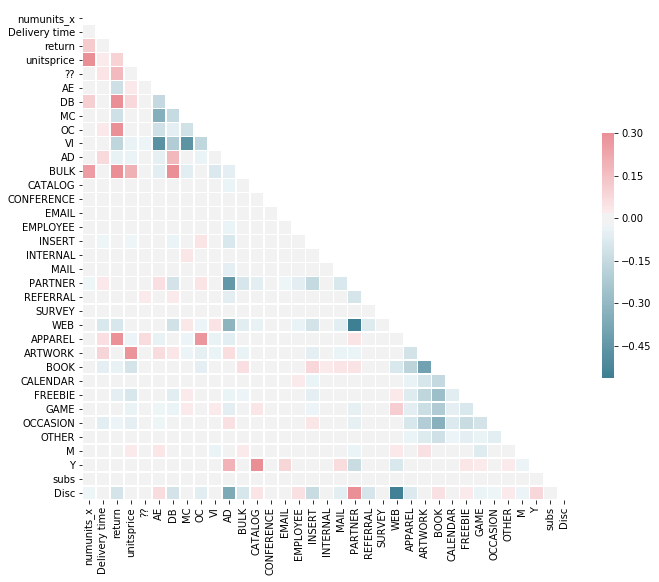

In [69]:
corr = predlog.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel = LogisticRegression()

In [73]:
logmodel.fit(X_train,y_train)

C:\Users\Przyw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Przyw\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
predictions = logmodel.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     82286
           1       0.89      0.58      0.70      3431

   micro avg       0.98      0.98      0.98     85717
   macro avg       0.94      0.79      0.85     85717
weighted avg       0.98      0.98      0.98     85717



In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test,predictions)

array([[82049,   237],
       [ 1447,  1984]], dtype=int64)

In [79]:
subs['start_date'] = pd.to_datetime(subs['start_date'])

In [80]:
subs.head()

,customer_id,rate_plan,monthly_fee,market,channel,start_date,stop_date,stop_type,tenure,censored
0,2,Top,150.0,Gotham,Dealer,2001-09-16,NaN,NaN,1929.0,1
1,52,Bottom,25.0,Metropolis,Mail,1997-01-13,2004-12-17,V,2895.0,0
2,76,Bottom,25.0,Gotham,Dealer,2000-12-08,2004-10-23,V,1415.0,0
3,89,Bottom,25.0,Gotham,Dealer,1999-09-16,2004-03-18,V,1645.0,0
4,217,Bottom,40.0,Gotham,Dealer,2000-09-04,2004-11-25,I,1543.0,0


In [81]:
mask = (subs['start_date'] > '2004-01-01') & (subs['start_date']<="2005-12-31")

In [82]:
thedeal = subs.loc[mask]

In [83]:
thedeal.count()

customer_id    2405177
rate_plan      2405177
monthly_fee    2405177
market         2405177
channel        2405177
start_date     2405177
stop_date      1333871
stop_type      1333871
tenure         2405177
censored       2405177
dtype: int64

In [84]:
thedeal['stop'] = np.where((thedeal['tenure']<364) & (thedeal['stop_type']!= np.nan),1,0)

C:\Users\Przyw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
t = thedeal.groupby(by=['monthly_fee'],)['customer_id'].count().to_frame().reset_index()
h = thedeal.groupby(by=['monthly_fee'],)['stop'].mean().to_frame().reset_index()

In [86]:
t.count()

monthly_fee    33
customer_id    33
dtype: int64

In [87]:
h.count()

monthly_fee    33
stop           33
dtype: int64

In [88]:
h.head()

,monthly_fee,stop
0,0.0,1.000000
1,7.0,0.000000
2,10.0,0.175926
3,12.0,1.000000
4,13.0,0.500000


In [89]:
t.head()

,monthly_fee,customer_id
0,0.0,1
1,7.0,1
2,10.0,1296
3,12.0,1
4,13.0,2


In [90]:
ml = pd.merge(t,h,on='monthly_fee',how='left')

In [91]:
ml['subscribers'] = ml['customer_id']

In [92]:
ml.drop(labels=['customer_id'],axis=1,inplace=True)

In [93]:
ml.head()

,monthly_fee,stop,subscribers
0,0.0,1.000000,1
1,7.0,0.000000,1
2,10.0,0.175926,1296
3,12.0,1.000000,1
4,13.0,0.500000,2


In [97]:
ml_order = pd.merge(orders_up,orders_upp,on='orderid',how='left')

In [106]:
ml_order.count()

orderid            192983
unitsprice         192983
unitsprice_prod    192983
dtype: int64

In [107]:
predv2 = pd.merge(ml_order,all_merge,on='orderid')

In [108]:
predv2.count()

orderid                 286017
unitsprice_x            286017
unitsprice_prod_x       286017
billdate                286017
numunits_x              286017
totalprice_x            286017
orderdate               286017
paymenttype             286017
totalprice_y            286017
numorderlines           286017
numunits_y              286017
state_y                 280045
countypop               280094
countyhu                280094
countylandareamiles     280094
countywaterareamiles    280094
Delivery time           286017
gender                  256967
customer_id               5188
stop_date                 3001
return                  286017
channel                 286017
discount                286017
freeshippingflag        286017
PRODUCTGROUPNAME        286008
FULLPRICE               286017
prod                    285652
unitsprice_y            285723
unitsprice_prod_y       286017
dtype: int64

In [102]:
X
Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel2 = LogisticRegression()